# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('User_Data.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

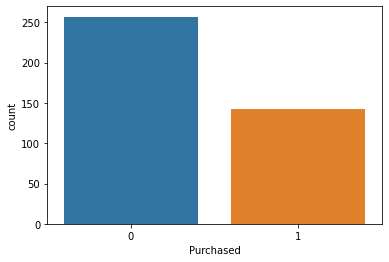

In [5]:
sns.countplot(x='Purchased',data=df)
plt.show()

In [6]:
# to predict the purchased we use Age and Est.Salary
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [7]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [8]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [9]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [10]:
y_pred= classifier.predict(x_test)  

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [12]:
lst1=[test for test in y_test]
lst2= [pred for pred in y_pred]
print('y_test --------- y_pred\n')
for x in range(10):
    print(lst1[x],"----",lst2[x])

y_test --------- y_pred

0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
0 ---- 1


In [13]:
# checking the accuracy of the prediction
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  

In [14]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [15]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.89

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [17]:
from sklearn.ensemble import RandomForestClassifier  
rfc= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
rfc.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [18]:
y_pred= rfc.predict(x_test)  

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [20]:
print(confusion_matrix(y_test, y_pred)  )

[[64  4]
 [ 4 28]]
